In [ ]:
# @title Q1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [ ]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [ ]:
df.head(5)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [ ]:
df['연령대'] = df['연령대코드(5세단위)'].replace(age_code)

In [ ]:
df.groupby(['연령대'])['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


In [ ]:
# @title Q2. '음주여부', '흡연상태','연령대코드(5세단위)', '성별코드'에 대한 상관계수 구하고 시각화하기

In [ ]:
cols = ['음주여부', '흡연상태','연령대코드(5세단위)', '성별코드']

In [ ]:
df[cols].corr()

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


In [ ]:
import seaborn as sns

In [ ]:
mask = np.zeros_like(df[cols].corr())
mask

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
mask[np.triu_indices_from(mask)]=True
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<Axes: title={'center': '상관관계 분석'}>

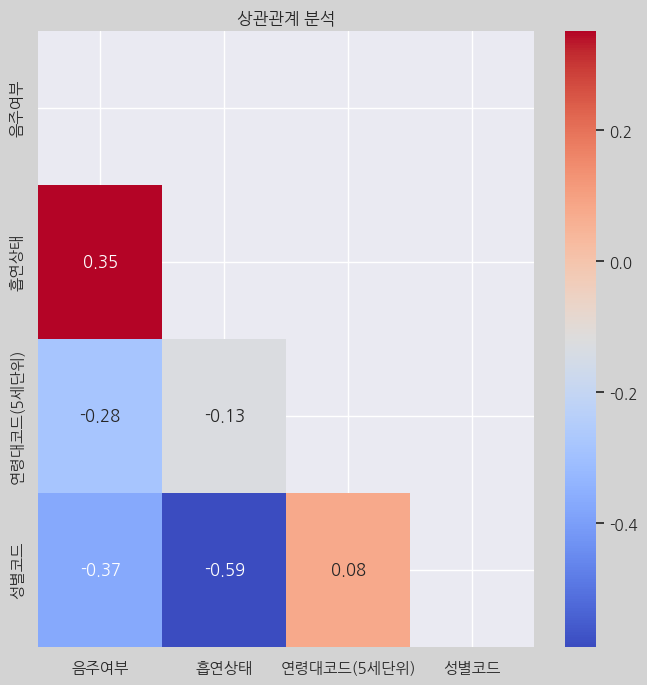

In [ ]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.facecolor':'lightgrey'},font='NanumGothic')

fig, ax = plt.subplots(figsize=(8,8))
plt.title('상관관계 분석')

# 조건 세로로 쓰는 이유 => 조건별 주석 처리 편리
sns.heatmap(df[cols].corr(),
            annot=True,
            fmt=".2f",
            mask = mask,
            #linewidths = 0.01,
            #linecolor = 'white',
            cmap="coolwarm",
            ax=ax)

In [ ]:
# @title Q3. 흡연,음주하는 사람들의 차이

In [ ]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [ ]:
df['흡연상태'] = df['흡연상태'].replace(smoke)
df['음주여부'] = df['음주여부'].replace(drink)

In [ ]:
pd.crosstab(index=df.음주여부, columns=df.흡연상태 , values = df.가입자일련번호, aggfunc="count")

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


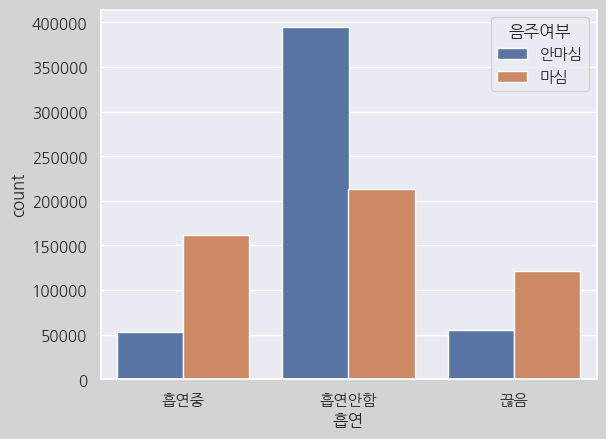

In [ ]:
ax = sns.countplot(data=df, x='흡연상태', hue='음주여부')
ax.set(xlabel='흡연')
plt.show()

In [ ]:
# @title Q4. 체중>=120kg 총콜레스테롤 감마지피티 음주여부에 따라 산점도 시각화하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [ ]:
df_biman = df[df["체중(5Kg 단위)"]>=120]

In [ ]:
df_biman

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
1219,2017,1220,2,6,41,170.0,120.0,116.0,0.7,0.9,...,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126,25~29세
2309,2017,2310,1,6,30,190.0,155.0,127.0,0.8,0.9,...,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126,25~29세
3497,2017,3498,1,7,46,175.0,120.0,119.0,1.2,1.2,...,흡연중,마심,0,NaN,NaN,NaN,NaN,NaN,20181126,30~34세
3685,2017,3686,1,7,30,180.0,140.0,127.0,1.5,1.5,...,끊음,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126,30~34세
5788,2017,5789,1,8,41,175.0,140.0,124.0,1.0,1.0,...,흡연안함,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996544,2017,996545,1,8,41,175.0,125.0,121.0,1.2,1.2,...,흡연중,마심,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세
996828,2017,996829,1,6,47,180.0,120.0,109.0,1.5,1.5,...,흡연중,마심,1,NaN,NaN,NaN,NaN,1.0,20181126,25~29세
997152,2017,997153,1,5,47,180.0,120.0,115.0,0.7,0.8,...,흡연안함,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126,20~24세
997414,2017,997415,1,7,46,170.0,135.0,129.0,1.0,1.2,...,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126,30~34세


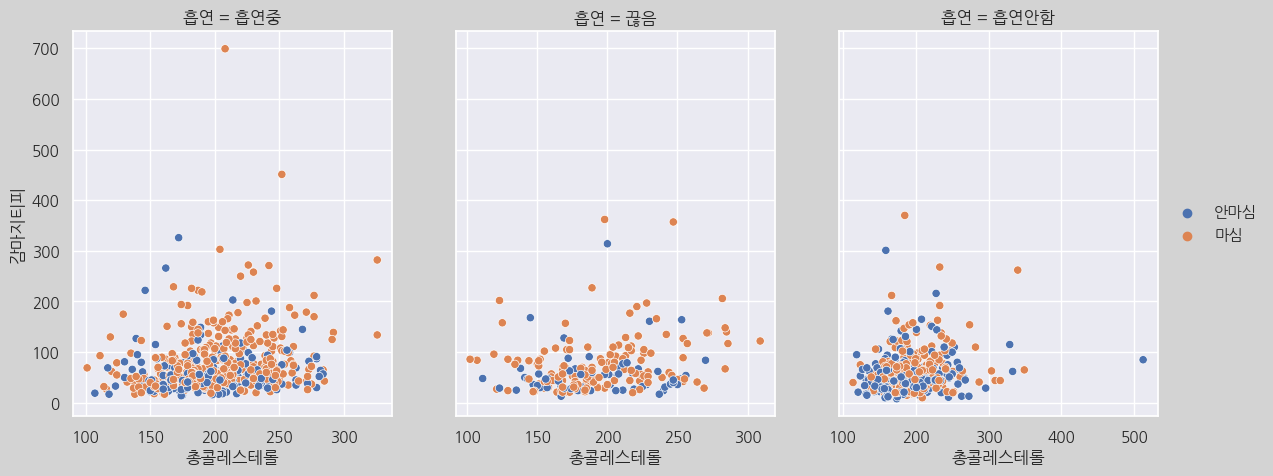

In [ ]:
df_smoke3 = df_biman[df_biman['흡연상태']=="흡연중"]
df_smoke2 = df_biman[df_biman['흡연상태']=="끊음"]
df_smoke1 = df_biman[df_biman['흡연상태']=="흡연안함"]

fig, axes = plt.subplots(1,3, figsize=(14,5),sharey=True)


axes[0].set_title('흡연 = 흡연중')
sns.scatterplot(data= df_smoke3, x="총콜레스테롤", y="감마지티피", hue="음주여부", legend=False, ax=axes[0])


axes[1].set_title('흡연 = 끊음')
sns.scatterplot(data= df_smoke2, x=df_smoke2["총콜레스테롤"], y=df_smoke2["감마지티피"], hue=df_smoke2["음주여부"], legend=False, ax=axes[1])


axes[2].set_title('흡연 = 흡연안함')
sns.scatterplot(data= df_smoke1, x=df_smoke1["총콜레스테롤"], y=df_smoke1["감마지티피"], hue=df_smoke1["음주여부"], ax=axes[2])

axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

plt.show()

<Figure size 1400x900 with 0 Axes>

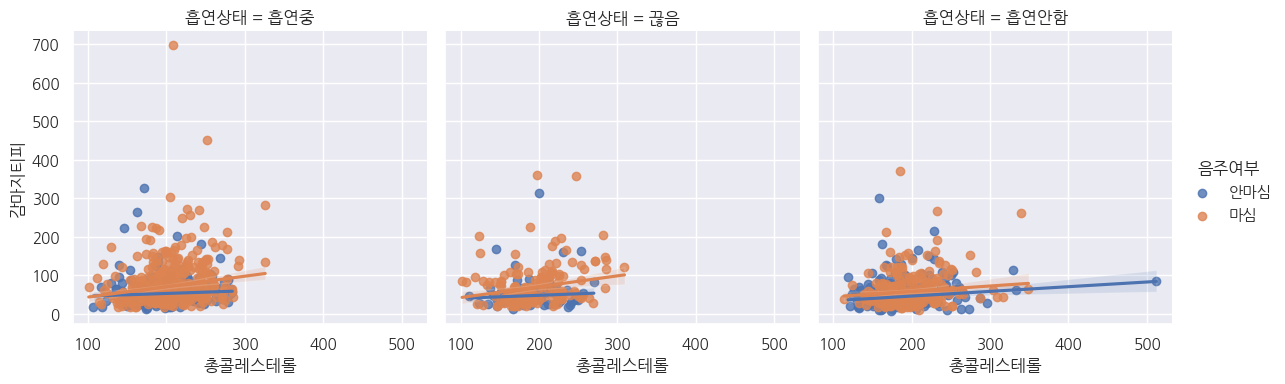

In [ ]:
sns.set(font="NanumGothic")

plt.figure(figsize=(14,9))
sns.lmplot(
    data=df_biman, x="총콜레스테롤", y="감마지티피",
    hue="음주여부", col="흡연상태", height=4, robust=True,
)

In [ ]:
# Q5. 연령대별로 성별 좌우 평균 시력 시각화하기

In [ ]:
df[['시력(좌)','시력(우)']].describe().T

,count,mean,std,min,25%,50%,75%,max
시력(좌),999712.0,0.978897,0.610948,0.1,0.7,1.0,1.2,9.9
시력(우),999721.0,0.976267,0.605323,0.1,0.7,1.0,1.2,9.9


In [ ]:
df_notBlind = df[df['시력(좌)'] != 9.9]
df_notBlind = df_notBlind[df_notBlind['시력(우)'] != 9.9]

In [ ]:
df_notBlind[['시력(좌)','시력(우)']].describe().T

,count,mean,std,min,25%,50%,75%,max
시력(좌),993899.0,0.950679,0.342590,0.1,0.7,1.0,1.2,2.5
시력(우),993908.0,0.948685,0.340885,0.1,0.7,1.0,1.2,2.5


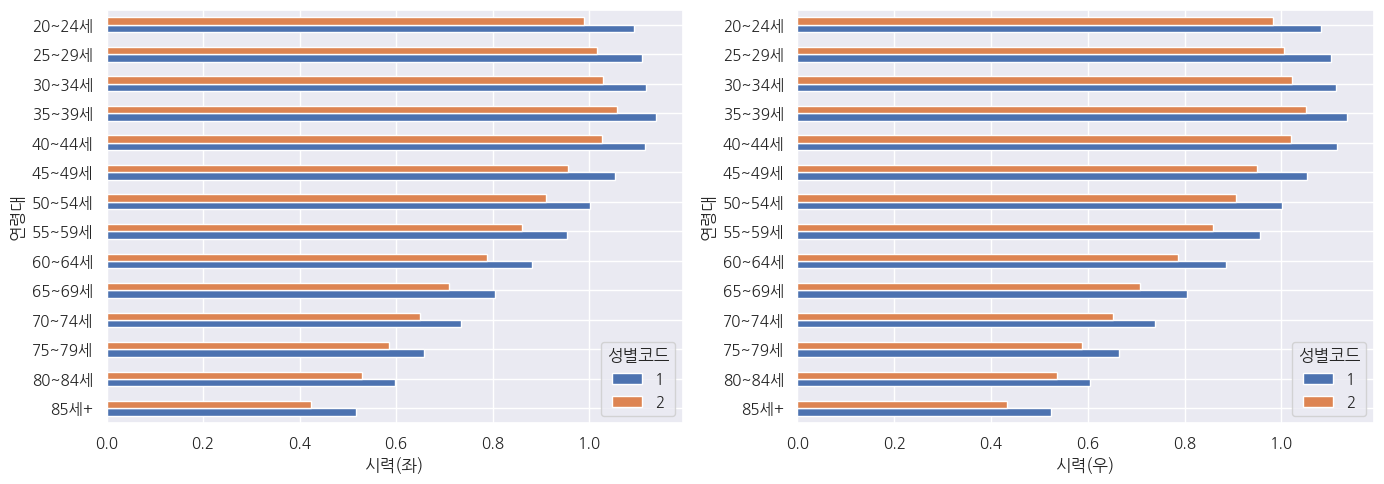

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,5))

pivot_df_left = pd.pivot_table(data=df_notBlind, index='연령대', columns='성별코드', values='시력(좌)', aggfunc='mean')
pivot_df_left = pivot_df_left.iloc[::-1]
pivot_df_left.plot.barh(ax=ax[0])
ax[0].set(xlabel='시력(좌)')

pivot_df_right = pd.pivot_table(data=df_notBlind, index='연령대', columns='성별코드', values='시력(우)', aggfunc='mean')
pivot_df_right = pivot_df_right.iloc[::-1]
pivot_df_right.plot.barh(ax=ax[1])
ax[1].set(xlabel='시력(우)')

plt.tight_layout()
plt.show()